# Challenge - Instagram Style Photo Collage
## Instagram Style Photo Collage
## Use OpenCV and Numpy to build a photo collage

In this exercise, you will build a photo collage using 5 images of pokemon as given in the dataset. The sample collage image and images to use in the collage are given in the Dataset folder.



## Submission Instructions 
You need to resize each pokemon 200X200 before using it. The final image should have size 430 X 430 px

### (10 border + 200 pokemon + 10 border + 200 pokemon + 10 border = 430 px) along row and column.

After that you need to convert the final image into a single .csv file of the shape (rows x cols, 3). Your accuracy will be based on percentage of values matched with our file. The CSV file should have a header "r,g,b" as column names.

In [6]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
center = cv2.imread('./Data/center.jpeg')
center = cv2.cvtColor(center,cv2.COLOR_BGR2RGB)
bottom_left = cv2.imread('./Data/bottom_left.jpg')
bottom_left = cv2.cvtColor(bottom_left,cv2.COLOR_BGR2RGB)
bottom_right = cv2.imread('./Data/bottom_right.jpg')
bottom_right = cv2.cvtColor(bottom_right,cv2.COLOR_BGR2RGB)
top_left = cv2.imread('./Data/top_left.jpg')
top_left = cv2.cvtColor(top_left,cv2.COLOR_BGR2RGB)
top_right = cv2.imread('./Data/top_right.jpg')
top_right = cv2.cvtColor(top_right,cv2.COLOR_BGR2RGB)

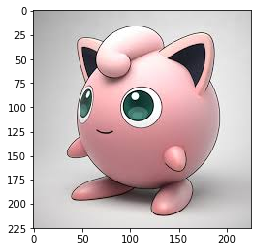

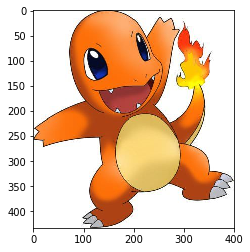

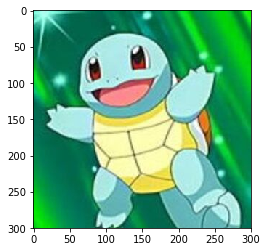

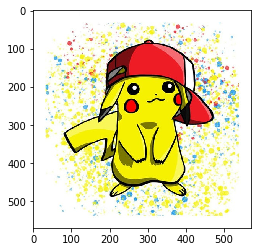

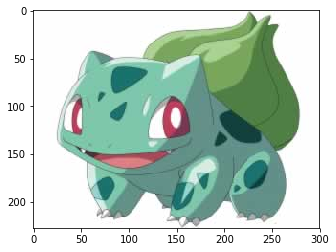

In [11]:
plt.imshow(center)
plt.show()
plt.imshow(bottom_left)
plt.show()
plt.imshow(bottom_right)
plt.show()
plt.imshow(top_left)
plt.show()
plt.imshow(top_right)
plt.show()

In [12]:
print(center.shape)
print(bottom_left.shape)
print(bottom_right.shape)
print(top_left.shape)
print(top_right.shape)

(225, 225, 3)
(434, 400, 3)
(300, 300, 3)
(570, 570, 3)
(228, 300, 3)


In [14]:
center = cv2.resize(center, (100,100))
bottom_left = cv2.resize(bottom_left, (200,200))
bottom_right = cv2.resize(bottom_right, (200,200))
top_left = cv2.resize(top_left, (200,200))
top_right = cv2.resize(top_right, (200,200))

In [16]:
print(center.shape)
print(bottom_left.shape)
print(bottom_right.shape)
print(top_left.shape)
print(top_right.shape)

(100, 100, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


In [17]:
def create_blank_black_canvas(width, height):
    image = np.zeros((height, width, 3), np.uint8)
    return image

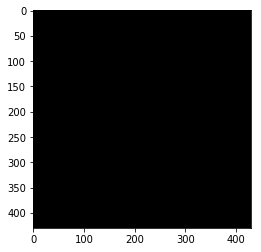

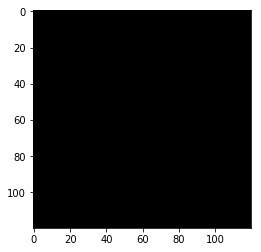

In [18]:
canvas = create_blank_black_canvas(430, 430)
canvas_for_center = create_blank_black_canvas(120, 120)
plt.imshow(canvas)
plt.show()
plt.imshow(canvas_for_center)
plt.show()

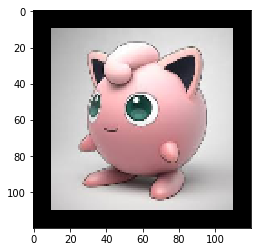

In [19]:
canvas_for_center[10:110,10:110] = center
plt.imshow(canvas_for_center)
plt.show()

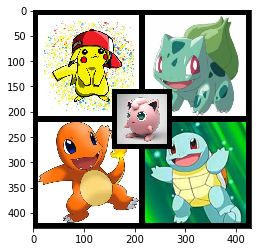

In [20]:
canvas[10:210,10:210] = top_left
canvas[10:210,220:420] = top_right
canvas[220:420,10:210] = bottom_left
canvas[220:420,220:420] = bottom_right
canvas[155:275,155:275] = canvas_for_center
plt.imshow(canvas)
plt.show()

In [25]:
canvas = cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR)
cv2.imwrite('sample_img1.jpeg', canvas)

True

In [29]:
r_channel = canvas[:, :, 2]
g_channel = canvas[:, :, 1]
b_channel = canvas[:, :, 0]
r_channel.shape

(430, 430)

In [30]:
r_channel = r_channel.reshape((430*430, 1))
g_channel = g_channel.reshape((430*430, 1))
b_channel = b_channel.reshape((430*430, 1))
r_channel.shape

(184900, 1)

In [31]:
img = np.hstack((r_channel, g_channel, b_channel))

print(img.shape)

(184900, 3)


In [32]:
df = pd.DataFrame(img,columns=['r','g','b'])

df.to_csv("Solution.csv",index=False)